# Подключение библиотек

In [54]:
pip install pymorphy3

Note: you may need to restart the kernel to use updated packages.


In [55]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [56]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [57]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

import re
import nltk
import pymorphy3

from nltk.stem.snowball import SnowballStemmer

In [58]:
pip freeze

aiobotocore @ file:///C:/b/abs_a0zxrsvpwx/croot/aiobotocore_1714464454692/work
aiohttp @ file:///C:/b/abs_8860tt1424/croot/aiohttp_1715108828392/work
aioitertools @ file:///tmp/build/80754af9/aioitertools_1607109665762/work
aiosignal @ file:///tmp/build/80754af9/aiosignal_1637843061372/work
alabaster @ file:///C:/b/abs_45ba4vacaj/croot/alabaster_1718201502252/work
altair @ file:///C:/Users/dev-admin/perseverance-python-buildout/croot/altair_1699497320503/work
anaconda-anon-usage @ file:///C:/b/abs_c3w_h1zzjg/croot/anaconda-anon-usage_1710965204622/work
anaconda-catalogs @ file:///C:/Users/dev-admin/perseverance-python-buildout/croot/anaconda-catalogs_1701816586117/work
anaconda-client @ file:///C:/b/abs_34txutm0ue/croot/anaconda-client_1708640705294/work
anaconda-cloud-auth @ file:///C:/b/abs_b02evi84gh/croot/anaconda-cloud-auth_1713991445770/work
anaconda-navigator @ file:///C:/b/abs_d8d4a02c3t/croot/anaconda-navigator_1713464063970/work
anaconda-project @ file:///C:/b/abs_95s0l9dwvd/

In [59]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rusla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Подключение дата сета

In [60]:
df = pd.read_csv("films250.csv")

In [61]:
df.head(10)

,Название,Год выпуска,Длительность,Описание_перевод,Рейтинг,Страна,Жанр
0,Побег из Шоушенка,1994,2h 22m,"Банкир, осужденный за уксорицид, образует друж...",9.3,United States,Drama
1,Крёстный отец,1972,2h 55m,Старение патриарха организованной криминальной...,9.2,United States,"Crime, Drama"
2,Тёмный рыцарь,2008,2h 32m,"Когда угроза, известная как Джокер, наносит ущ...",9.0,"United States, United Kingdom","Action, Crime, Drama"
3,Крёстный отец 2,1974,3h 22m,Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...,9.0,United States,"Crime, Drama"
4,12 рaзгневанных мужчин,1957,1h 36m,Присяжные в суде по делу об убийстве в Нью -Йо...,9.0,United States,"Crime, Drama"
5,Властелин колец: Возвращение короля,2003,3h 21m,Гандальф и Арагорн ведут мир людей против арми...,9.0,"New Zealand, United States","Adventure, Drama, Fantasy"
6,Список Шиндлера,1993,3h 15m,В оккупированной немецкой Поль году во время В...,9.0,United States,"Biography, Drama, History"
7,Криминальное чтиво,1994,2h 34m,"Жизнь двух наемников толпы, боксера, гангстера...",8.9,United States,"Crime, Drama"
8,Властелин колец: Братство кольца,2001,2h 58m,Крутый хоббит из Шира и восемь компаньонов отп...,8.9,"New Zealand, United States, United Kingdom","Adventure, Drama, Fantasy"
9,"Хороший, плохой, злой",1966,2h 41m,Мошенничество на щедрости присоединяется к дву...,8.8,"Italy, Spain, West Germany, United States","Adventure, Western"


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Название          250 non-null    object 
 1   Год выпуска       250 non-null    int64  
 2   Длительность      250 non-null    object 
 3   Описание_перевод  250 non-null    object 
 4   Рейтинг           250 non-null    float64
 5   Страна            250 non-null    object 
 6   Жанр              250 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 13.8+ KB


In [63]:
df.Описание_перевод[8]

'Крутый хоббит из Шира и восемь компаньонов отправился в путешествие, чтобы уничтожить мощное кольцо и спасти Средиземье от Темного лорда Саурона.'

### Обработка 

In [64]:
st = '\xa0—'
def remove_othersymbol(text):
    return ''.join([ch if ch not in st else ' ' for ch in text])

In [65]:
def remove_punctuation(text):
    return ''.join([ch for ch in text if ch not in string.punctuation])

In [66]:
df['Обработанный текст']= [remove_othersymbol(text.lower()) for text in df.Описание_перевод]

In [67]:
df.head(9)

,Название,Год выпуска,Длительность,Описание_перевод,Рейтинг,Страна,Жанр,Обработанный текст
0,Побег из Шоушенка,1994,2h 22m,"Банкир, осужденный за уксорицид, образует друж...",9.3,United States,Drama,"банкир, осужденный за уксорицид, образует друж..."
1,Крёстный отец,1972,2h 55m,Старение патриарха организованной криминальной...,9.2,United States,"Crime, Drama",старение патриарха организованной криминальной...
2,Тёмный рыцарь,2008,2h 32m,"Когда угроза, известная как Джокер, наносит ущ...",9.0,"United States, United Kingdom","Action, Crime, Drama","когда угроза, известная как джокер, наносит ущ..."
3,Крёстный отец 2,1974,3h 22m,Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...,9.0,United States,"Crime, Drama",ранняя жизнь и карьера вито корлеоне в 1920 -х...
4,12 рaзгневанных мужчин,1957,1h 36m,Присяжные в суде по делу об убийстве в Нью -Йо...,9.0,United States,"Crime, Drama",присяжные в суде по делу об убийстве в нью -йо...
5,Властелин колец: Возвращение короля,2003,3h 21m,Гандальф и Арагорн ведут мир людей против арми...,9.0,"New Zealand, United States","Adventure, Drama, Fantasy",гандальф и арагорн ведут мир людей против арми...
6,Список Шиндлера,1993,3h 15m,В оккупированной немецкой Поль году во время В...,9.0,United States,"Biography, Drama, History",в оккупированной немецкой поль году во время в...
7,Криминальное чтиво,1994,2h 34m,"Жизнь двух наемников толпы, боксера, гангстера...",8.9,United States,"Crime, Drama","жизнь двух наемников толпы, боксера, гангстера..."
8,Властелин колец: Братство кольца,2001,2h 58m,Крутый хоббит из Шира и восемь компаньонов отп...,8.9,"New Zealand, United States, United Kingdom","Adventure, Drama, Fantasy",крутый хоббит из шира и восемь компаньонов отп...


In [68]:
df["Описание_перевод"][8]

'Крутый хоббит из Шира и восемь компаньонов отправился в путешествие, чтобы уничтожить мощное кольцо и спасти Средиземье от Темного лорда Саурона.'

In [69]:
df["Обработанный текст"][8]

'крутый хоббит из шира и восемь компаньонов отправился в путешествие, чтобы уничтожить мощное кольцо и спасти средиземье от темного лорда саурона.'

In [70]:
russian_stopwords = stopwords.words("russian") 

In [71]:
russian_stopwords.extend(['т.д.', 'т', 'д', 'это','который','которые','которых','свой','своём','всем','всё','её','оба','ещё','должный','должные','должных']) 

In [72]:
def tokenize(text):
    t = word_tokenize(text)
    tokens = [token for token in t if token not in russian_stopwords]
    text = " ".join(tokens)
    return text

In [73]:
df['Токенизированный текст'] = [tokenize(text) for text in df['Обработанный текст']]

In [74]:
df

,Название,Год выпуска,Длительность,Описание_перевод,Рейтинг,Страна,Жанр,Обработанный текст,Токенизированный текст
0,Побег из Шоушенка,1994,2h 22m,"Банкир, осужденный за уксорицид, образует друж...",9.3,United States,Drama,"банкир, осужденный за уксорицид, образует друж...","банкир , осужденный уксорицид , образует дружб..."
1,Крёстный отец,1972,2h 55m,Старение патриарха организованной криминальной...,9.2,United States,"Crime, Drama",старение патриарха организованной криминальной...,старение патриарха организованной криминальной...
2,Тёмный рыцарь,2008,2h 32m,"Когда угроза, известная как Джокер, наносит ущ...",9.0,"United States, United Kingdom","Action, Crime, Drama","когда угроза, известная как джокер, наносит ущ...","угроза , известная джокер , наносит ущерб хаос..."
3,Крёстный отец 2,1974,3h 22m,Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...,9.0,United States,"Crime, Drama",ранняя жизнь и карьера вито корлеоне в 1920 -х...,ранняя жизнь карьера вито корлеоне 1920 -х год...
4,12 рaзгневанных мужчин,1957,1h 36m,Присяжные в суде по делу об убийстве в Нью -Йо...,9.0,United States,"Crime, Drama",присяжные в суде по делу об убийстве в нью -йо...,присяжные суде делу убийстве нью -йорке разоча...
...,...,...,...,...,...,...,...,...,...
245,Форма голоса,2016,2h 10m,"Глухая девушка, Шоко, издевается популярной Ша...",8.1,Japan,"Animation, Drama","глухая девушка, шоко, издевается популярной ша...","глухая девушка , шоко , издевается популярной ..."
246,Прислуга,2011,2h 26m,Начинающий автор во время движения за гражданс...,8.1,"United States, India",Drama,начинающий автор во время движения за гражданс...,начинающий автор время движения гражданские пр...
247,Сука любовь,2000,2h 34m,"Любительский боец ​​собаки, супермодель и забр...",8.0,Mexico,"Drama, Thriller","любительский боец ​​собаки, супермодель и забр...","любительский боец ​​собаки , супермодель забро..."
248,Ребекка,1940,2h 10m,Самосознательная женщина жонглирует приспособл...,8.1,United States,"Drama, Mystery, Romance",самосознательная женщина жонглирует приспособл...,самосознательная женщина жонглирует приспособл...


In [75]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\rusla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [76]:
morph = pymorphy3.MorphAnalyzer(lang='ru')

In [77]:
%%time
lemm_texts_list = []
for text in (df['Токенизированный текст']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = morph.parse(word)[0]
            res.append(p.normal_form)
        text = " ".join(res)
        lemm_texts_list.append(text)
    except Exception as e:
        print(e)
    
df['Лематизированный текст'] = lemm_texts_list

CPU times: total: 2.84 s
Wall time: 2.9 s


In [78]:
df.head(9)

,Название,Год выпуска,Длительность,Описание_перевод,Рейтинг,Страна,Жанр,Обработанный текст,Токенизированный текст,Лематизированный текст
0,Побег из Шоушенка,1994,2h 22m,"Банкир, осужденный за уксорицид, образует друж...",9.3,United States,Drama,"банкир, осужденный за уксорицид, образует друж...","банкир , осужденный уксорицид , образует дружб...","банкир , осудить уксорицид , образовать дружба..."
1,Крёстный отец,1972,2h 55m,Старение патриарха организованной криминальной...,9.2,United States,"Crime, Drama",старение патриарха организованной криминальной...,старение патриарха организованной криминальной...,старение патриарх организовать криминальный ди...
2,Тёмный рыцарь,2008,2h 32m,"Когда угроза, известная как Джокер, наносит ущ...",9.0,"United States, United Kingdom","Action, Crime, Drama","когда угроза, известная как джокер, наносит ущ...","угроза , известная джокер , наносит ущерб хаос...","угроза , известный джокер , наносить ущерб хао..."
3,Крёстный отец 2,1974,3h 22m,Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...,9.0,United States,"Crime, Drama",ранняя жизнь и карьера вито корлеоне в 1920 -х...,ранняя жизнь карьера вито корлеоне 1920 -х год...,ранний жизнь карьера вить корлеон 1920 -х год ...
4,12 рaзгневанных мужчин,1957,1h 36m,Присяжные в суде по делу об убийстве в Нью -Йо...,9.0,United States,"Crime, Drama",присяжные в суде по делу об убийстве в нью -йо...,присяжные суде делу убийстве нью -йорке разоча...,присяжный суд дело убийство нью -йорк разочаро...
5,Властелин колец: Возвращение короля,2003,3h 21m,Гандальф и Арагорн ведут мир людей против арми...,9.0,"New Zealand, United States","Adventure, Drama, Fantasy",гандальф и арагорн ведут мир людей против арми...,гандальф арагорн ведут мир людей против армии ...,гандальф арагорн вести мир человек против арми...
6,Список Шиндлера,1993,3h 15m,В оккупированной немецкой Поль году во время В...,9.0,United States,"Biography, Drama, History",в оккупированной немецкой поль году во время в...,оккупированной немецкой поль году время второй...,оккупировать немецкий поль год время второй ми...
7,Криминальное чтиво,1994,2h 34m,"Жизнь двух наемников толпы, боксера, гангстера...",8.9,United States,"Crime, Drama","жизнь двух наемников толпы, боксера, гангстера...","жизнь двух наемников толпы , боксера , гангсте...","жизнь два наёмник толпа , боксёр , гангстер же..."
8,Властелин колец: Братство кольца,2001,2h 58m,Крутый хоббит из Шира и восемь компаньонов отп...,8.9,"New Zealand, United States, United Kingdom","Adventure, Drama, Fantasy",крутый хоббит из шира и восемь компаньонов отп...,крутый хоббит шира восемь компаньонов отправил...,круть хоббит шир восемь компаньон отправиться ...


In [79]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\rusla\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backends is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


In [80]:
# Получение текстовой строки из списка слов
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus

# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus

# Получение облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud

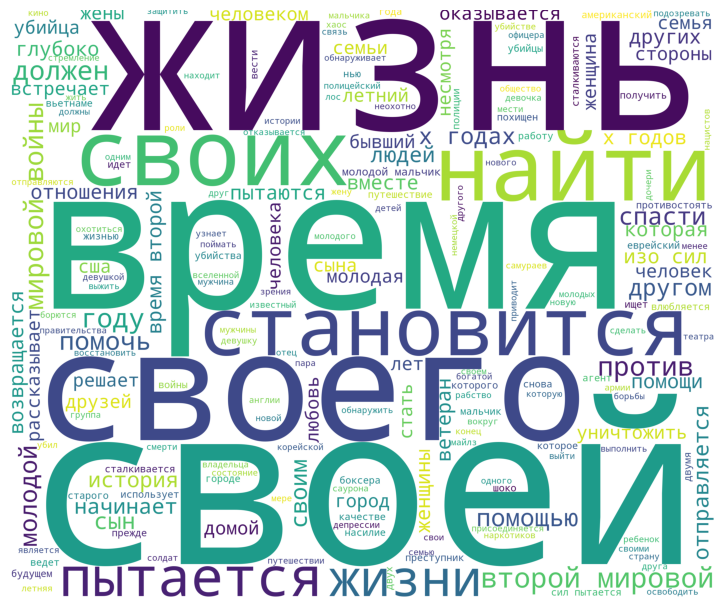

In [81]:
corpus = get_corpus(df['Токенизированный текст'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.show()

In [82]:
# Получение облака слов
def get_wordCloud2(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(corpus)
    return wordCloud

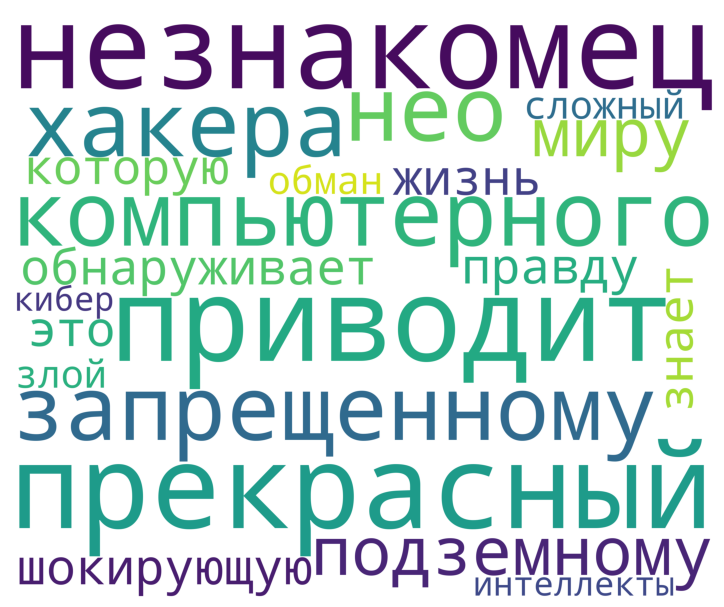

In [83]:
corpus = df['Токенизированный текст'][15]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.show()

In [84]:
import re
from collections import Counter

def remove_most_common_words(text, num_words=10):
   
    words = re.findall(r"\b[a-zA-Zа-яА-ЯёЁ]+\b", text.lower())
    
    word_counts = Counter(words)
    
    most_common = [word for word, count in word_counts.most_common(num_words)]
    
    pattern = re.compile(r"\b(" + "|".join(map(re.escape, most_common)) + r")\b", flags=re.IGNORECASE)
    cleaned_text = pattern.sub("", text)
    
    cleaned_text = re.sub(r"\s+", " ", cleaned_text).strip()

    return cleaned_text

In [85]:
df.head(5)

,Название,Год выпуска,Длительность,Описание_перевод,Рейтинг,Страна,Жанр,Обработанный текст,Токенизированный текст,Лематизированный текст
0,Побег из Шоушенка,1994,2h 22m,"Банкир, осужденный за уксорицид, образует друж...",9.3,United States,Drama,"банкир, осужденный за уксорицид, образует друж...","банкир , осужденный уксорицид , образует дружб...","банкир , осудить уксорицид , образовать дружба..."
1,Крёстный отец,1972,2h 55m,Старение патриарха организованной криминальной...,9.2,United States,"Crime, Drama",старение патриарха организованной криминальной...,старение патриарха организованной криминальной...,старение патриарх организовать криминальный ди...
2,Тёмный рыцарь,2008,2h 32m,"Когда угроза, известная как Джокер, наносит ущ...",9.0,"United States, United Kingdom","Action, Crime, Drama","когда угроза, известная как джокер, наносит ущ...","угроза , известная джокер , наносит ущерб хаос...","угроза , известный джокер , наносить ущерб хао..."
3,Крёстный отец 2,1974,3h 22m,Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...,9.0,United States,"Crime, Drama",ранняя жизнь и карьера вито корлеоне в 1920 -х...,ранняя жизнь карьера вито корлеоне 1920 -х год...,ранний жизнь карьера вить корлеон 1920 -х год ...
4,12 рaзгневанных мужчин,1957,1h 36m,Присяжные в суде по делу об убийстве в Нью -Йо...,9.0,United States,"Crime, Drama",присяжные в суде по делу об убийстве в нью -йо...,присяжные суде делу убийстве нью -йорке разоча...,присяжный суд дело убийство нью -йорк разочаро...


In [86]:
vectorizer = CountVectorizer()
count_matrix1 = vectorizer.fit(df['Лематизированный текст'])

In [87]:
print("Уникальных значений: ", len(vectorizer.vocabulary_))

Уникальных значений:  2243


In [88]:
print("Ключи: ", (vectorizer.vocabulary_))

Ключи:  {'банкир': 128, 'осудить': 1225, 'уксорицид': 2051, 'образовать': 1148, 'дружба': 529, 'четверть': 2167, 'век': 232, 'закалённый': 583, 'сохранять': 1843, 'невиновность': 1071, 'пытаться': 1582, 'оставаться': 1215, 'надежда': 1012, 'простой': 1553, 'сострадание': 1840, 'старение': 1877, 'патриарх': 1286, 'организовать': 1201, 'криминальный': 827, 'династия': 491, 'передавать': 1296, 'контроль': 802, 'тайна': 1943, 'империя': 675, 'неохотный': 1099, 'сын': 1938, 'угроза': 2030, 'известный': 650, 'джокер': 482, 'наносить': 1030, 'ущерб': 2081, 'хаос': 2117, 'народ': 1039, 'готэма': 415, 'бэтмена': 216, 'джеймс': 473, 'гордон': 407, 'харви': 2119, 'дента': 452, 'должный': 509, 'работать': 1588, 'вместе': 268, 'положить': 1389, 'конец': 792, 'безумие': 143, 'ранний': 1616, 'жизнь': 561, 'карьера': 740, 'вить': 258, 'корлеон': 809, '1920': 10, 'год': 399, 'изображаться': 662, 'время': 323, 'майкл': 905, 'расширять': 1631, 'подтягивать': 1366, 'власть': 263, 'отношение': 1243, 'синди

In [89]:
vectorizer = CountVectorizer(analyzer='word', stop_words=russian_stopwords, ngram_range=(1, 3), min_df=2)
count_matrix = vectorizer.fit_transform(df['Токенизированный текст'])

In [90]:
count_matrix.shape

(250, 565)

In [91]:
vectorizer.get_feature_names_out()[150:190]

array(['друзьями', 'еврейский', 'единственный', 'жаждет', 'жену',
       'женщина', 'женщину', 'женщины', 'жены', 'жертв', 'жестокого',
       'живет', 'жизни', 'жизнь', 'жизнью', 'жить', 'жонглирует',
       'заботится', 'заклинание', 'запад', 'заставляет', 'защитить',
       'защитить своего', 'защищает', 'землю', 'земля', 'золотой',
       'зрения', 'игр', 'игрушки', 'идет', 'избежать', 'известный',
       'измерений', 'изо', 'изо сил', 'изо сил пытается',
       'изо сил пытаются', 'имени', 'имеют'], dtype=object)

In [92]:
print(count_matrix)

  (0, 42)	1
  (0, 410)	1
  (0, 277)	1
  (1, 190)	1
  (2, 543)	1
  (2, 127)	1
  (2, 133)	1
  (2, 56)	1
  (2, 211)	1
  (3, 163)	1
  (3, 2)	1
  (3, 98)	1
  (3, 71)	1
  (3, 508)	1
  (3, 52)	1
  (3, 469)	1
  (3, 3)	1
  (4, 506)	1
  (4, 119)	1
  (4, 522)	1
  (4, 306)	1
  (4, 204)	1
  (4, 321)	1
  (4, 170)	1
  (4, 379)	1
  :	:
  (247, 184)	1
  (247, 464)	1
  (247, 409)	1
  (247, 185)	1
  (247, 466)	1
  (247, 187)	1
  (247, 524)	1
  (247, 238)	1
  (247, 25)	1
  (248, 438)	1
  (248, 158)	2
  (248, 302)	1
  (248, 346)	1
  (248, 166)	1
  (248, 429)	1
  (248, 155)	1
  (249, 500)	1
  (249, 489)	1
  (249, 407)	1
  (249, 408)	1
  (249, 458)	1
  (249, 548)	1
  (249, 381)	1
  (249, 513)	1
  (249, 514)	1


# TF-IDF

In [93]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=11000,
                                 min_df=0.01, stop_words=russian_stopwords,
                                 ngram_range=(1,3))

In [94]:
%%time
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Лематизированный текст'])

CPU times: total: 125 ms
Wall time: 121 ms


In [95]:
tfidf_matrix.shape

(250, 333)

In [96]:
print(tfidf_matrix)

  (0, 233)	0.5609971780776377
  (0, 155)	0.5366385402397056
  (0, 240)	0.36095022211117994
  (0, 32)	0.5167360839695784
  (1, 303)	0.6470474266006888
  (1, 107)	0.7624497542326485
  (2, 210)	0.2972057194838315
  (2, 16)	0.2972057194838315
  (2, 120)	0.2737570269884357
  (2, 209)	0.2972057194838315
  (2, 41)	0.2737570269884357
  (2, 244)	0.28430097278069066
  (2, 31)	0.2972057194838315
  (2, 68)	0.2972057194838315
  (2, 159)	0.2972057194838315
  (2, 322)	0.28430097278069066
  (2, 105)	0.2648422478448223
  (2, 315)	0.2972057194838315
  (3, 1)	0.4341572386708822
  (3, 187)	0.36564967695959066
  (3, 39)	0.4341572386708822
  (3, 49)	0.26116770020337915
  (3, 66)	0.2533639819514202
  (3, 0)	0.4341572386708822
  (3, 93)	0.2462205553499223
  :	:
  (246, 66)	0.20859449857025675
  (246, 244)	0.3419213374335014
  (247, 22)	0.36473311616919324
  (247, 162)	0.36473311616919324
  (247, 252)	0.38128876996233557
  (247, 131)	0.3397692853629819
  (247, 274)	0.3397692853629819
  (247, 312)	0.31330655832

# Тематическое моделирование

In [100]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [101]:
import gensim

In [105]:
gensim_dictionary = gensim.corpora.Dictionary(df['Токенизированный текст'])
gensim_dictionary.filter_extremes(no_above=0.1, no_below=20)
gensim_dictionary.compactify()

In [106]:
corpus = [gensim_dictionary.doc2bow(text) 
          for text in df['Токенизированный текст']]

In [107]:
corpus

[[],
 [],
 [],
 [(0, 1)],
 [],
 [],
 [],
 [(0, 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [(0, 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [(0, 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [(0, 1)],
 [],
 [],
 [],
 [],
 [],
 [(0, 2)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [(0, 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [(0, 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [(0, 1)],
 [(0, 1)],
 [],
 [],
 [],
 [(0, 1)],
 [],
 [],
 [],
 [],
 [],
 [(0, 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [(0, 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [(0, 2)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 

In [108]:
lda_20 = gensim.models.LdaMulticore(corpus, 
                                 num_topics=5, 
                                 id2word=gensim_dictionary, 
                                 passes=10, random_state=6457)

In [109]:
lda_20.print_topics()

[(0, '1.000*"жизнь"'),
 (1, '1.000*"жизнь"'),
 (2, '1.000*"жизнь"'),
 (3, '1.000*"жизнь"'),
 (4, '1.000*"жизнь"')]

In [163]:
with open('vectorize_Films.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)

In [110]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [111]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [112]:
vis_20 = gensimvis.prepare(lda_20, corpus, gensim_dictionary)

In [113]:
pyLDAvis.enable_notebook()

In [114]:
vis_20

PreparedData(topic_coordinates=         x    y  topics  cluster       Freq
topic                                      
1      0.0  0.0       1        1  34.750027
0      0.0  0.0       2        1  18.487124
2      0.0  0.0       3        1  16.314657
3      0.0  0.0       4        1  16.311283
4      0.0  0.0       5        1  14.136909, topic_info=    Term       Freq  Total Category  logprob  loglift
0  жизнь  22.000000   22.0  Default      1.0      1.0
0  жизнь   7.645006   22.0   Topic1      0.0      0.0
0  жизнь   4.067167   22.0   Topic2      0.0      0.0
0  жизнь   3.589225   22.0   Topic3      0.0      0.0
0  жизнь   3.588482   22.0   Topic4      0.0      0.0
0  жизнь   3.110120   22.0   Topic5      0.0      0.0, token_table=      Topic      Freq   Term
term                        
0         1  0.363636  жизнь
0         2  0.181818  жизнь
0         3  0.181818  жизнь
0         4  0.181818  жизнь
0         5  0.136364  жизнь, R=1, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3, 4, 5])

## LDA

In [115]:
from gensim.models import CoherenceModel

coherence_model = CoherenceModel(model=lda_20,
                                 texts=df['Лематизированный текст'],
                                 dictionary=gensim_dictionary,
                                 coherence="c_v")

coherence_value = coherence_model.get_coherence()
print(f"Когерентность модели: {coherence_value}")

Когерентность модели: nan


C:\Users\rusla\anaconda3\Lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in scalar divide
  m_lr_i = np.log(numerator / denominator)
C:\Users\rusla\anaconda3\Lib\site-packages\gensim\topic_coherence\indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in scalar divide
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


In [116]:
from sklearn.decomposition import LatentDirichletAllocation

In [117]:
# создание модели LDA
lda_model = LatentDirichletAllocation(n_components=10, random_state=0)
lda_model.fit(count_matrix)

# вывод топ слов для каждой темы
for i, topic in enumerate(lda_model.components_):
    print(f"Topic {i}: {', '.join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-19:-1]])}")

Topic 0: время, пытается, своего, сына, найти, молодых, людей, году, полиции, любовь, семьи, жизнью, одного, своими, своего сына, глубоко, убийстве, друга
Topic 1: своей, своего, помочь, помощью, несмотря, бывший, своих, молодая, жизни, лет, решает, стать, годах, должен, сталкиваются, состояние, неохотно, старого
Topic 2: своих, жизнь, спасти, борьбы, семья, узнает, должен, будущем, уничтожить, убийцы, тихую, союз, отчаянно, время, которое, возвращается, молодого, пытаясь
Topic 3: жизнь, своей, отправляется, человеком, встречает, которая, сталкивается, становится, ведет, другом, майлз, вскоре, время, истории, корабль, отказывается, дочери, жить
Topic 4: мировой войны, мировой, войны, второй мировой войны, второй мировой, второй, время, году, вместе, летний, время второй, время второй мировой, своей, против, века, нью, немецкой, город
Topic 5: женщины, молодой, жизнь, пытается, помощью, городе, класса, сил, американский, рабочего класса, рабочего, изо, изо сил, сил пытается, изо сил пыт

In [118]:
lda_model = LatentDirichletAllocation(learning_method='online', random_state=5, n_jobs=-1, n_components=10)
lda_model.fit(count_matrix)

LatentDirichletAllocation(learning_method='online', n_jobs=-1, random_state=5)

In [119]:
#датафрейм для ключевых слов каждой темы
topic_keywords = pd.DataFrame()
for i,topic in enumerate(lda_model.components_):
    topic_keywords[f'Topic {i + 1}'] = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
topic_keywords

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
0,друга,семья,стать,молодой,найти,общество,человека,мальчик,24,автомобилей
1,семья,жаждет,качестве,должен,своей,против,вернуть,время второй мировой,жены,похищен
2,пытаются,девушкой,имеют,пытается,семьи,жизнь,обращается,время второй,жизнь,штата
3,жизнь,своей,путешествии,помощи,женщины,своей,своего,время,часа,силами
4,время,работу,го,спасти,изо,ведет,которое,второй мировой войны,24 часа,своему
5,молодой,старого,го века,годах,изо сил,корейской,противостоять,мировой войны,день,продавец
6,1920,отправляется,17,своей,сил,летний,становится,войны,подозревать,гарри
7,самураев,время,вскоре,найти,своего,войны,своей,второй мировой,майлз,убил
8,своих,помощью,века,жизнь,пытается,году,жизнь,второй,наркотиков,нью
9,становится,годов,другом,жизни,время,своих,должен,мировой,друзей,рабство


# NMF

In [120]:
from sklearn.decomposition import NMF

In [121]:
# создание модели NMF
nmf_model = NMF(n_components=10, random_state=0)
nmf_model.fit(tfidf_matrix)

# вывод топ слов для каждой темы
for i, topic in enumerate(nmf_model.components_):
    print(f"Topic {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-19:-1]])}")

Topic 0: человек, молодой человек, паук, мир, собираться, становиться, обращаться, вести, просить, секретарь, армия, мать, остановить, отправляться, битва, саурон, космический, космический корабль
Topic 1: война, мировой, мировой война, второй мировой, второй мировой война, второй, время, немецкий, время второй, время второй мировой, история, конец, офицер, план, сила, выжить, нацистский, американский
Topic 2: друг, друг друг, менее, иметь, банда, вьетнам, снова, старое, день, смерть, проходить, искать, мир, французский, империя, сталкиваться, южный, ирландский
Topic 3: год, военный, семья, американский, преступник, девушка, летний, разведчик, 1950 год, 1950, сделать, 1920 год, 1920, час, корейский, точка зрение, зрение, точка
Topic 4: молодой, женщина, мальчик, молодой женщина, новый, молодой мальчик, отправляться, дом, союз, помощь, единственный, остановиться, убийца, молодой человек, тело, вместе, мечта, воин
Topic 5: жизнь, найти, разочаровать, помощь, насилие, разрушить, подарок, 

# LSA

In [122]:
from sklearn.decomposition import TruncatedSVD

In [123]:
# создание модели LSA
lsa_model = TruncatedSVD(n_components=10, random_state=0)
lsa_model.fit(tfidf_matrix)

# вывод топ слов для каждой темы
for i, topic in enumerate(lsa_model.components_):
    print(f"Topic {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

Topic 0: жизнь, молодой, человек, друг, время, год, война, пытаться, мировой, мировой война
Topic 1: мировой война, мировой, война, второй мировой война, второй мировой, второй, время второй мировой, время второй, немецкий, время
Topic 2: друг, друг друг, менее, империя, сын, война, иметь, время, сила, смерть
Topic 3: человек, друг, молодой, молодой человек, жизнь, друг друг, отправляться, война, вьетнам, город
Topic 4: человек, время, семья, убийство, мир, жена, отношение, год, жизнь, собираться
Topic 5: жизнь, помощь, пытаться, найти, подарок, разочаровать, спасти, стареть, отец, любовь
Topic 6: пытаться, сила, человек, сила пытаться, спасти, друг, молодой, империя, мир, начинать
Topic 7: сын, становиться, империя, жертва, время, защитить, похитить, убить, группа, использовать
Topic 8: убийство, начинать, жена, женщина, группа, подозревать, начинать подозревать, идти, чей, дело
Topic 9: ребёнок, помощь, семья, убийца, город, преступник, отношение, мир, против, человек


# Кластеризация

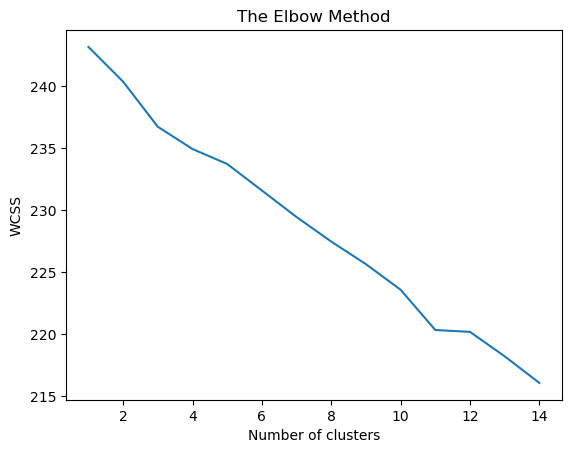

In [124]:
# Определяем кол-во кластеров для метода K-means
from sklearn.cluster import KMeans
X = tfidf_matrix
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [125]:
kmeans = KMeans(init='k-means++', n_clusters=11, n_init=28, random_state=42)
kmeans.fit(X)
pred=kmeans.fit_predict(X)

In [126]:
import pickle

model = kmeans

with open('3df_km.pkl', 'wb') as file:
    pickle.dump(model, file)

In [127]:
df['Кластер'] = pd.Series(pred)

In [128]:
df

,Название,Год выпуска,Длительность,Описание_перевод,Рейтинг,Страна,Жанр,Обработанный текст,Токенизированный текст,Лематизированный текст,Кластер
0,Побег из Шоушенка,1994,2h 22m,"Банкир, осужденный за уксорицид, образует друж...",9.3,United States,Drama,"банкир, осужденный за уксорицид, образует друж...","[банкир, ,, осужденный, уксорицид, ,, образует...","банкир , осудить уксорицид , образовать дружба...",10
1,Крёстный отец,1972,2h 55m,Старение патриарха организованной криминальной...,9.2,United States,"Crime, Drama",старение патриарха организованной криминальной...,"[старение, патриарха, организованной, криминал...",старение патриарх организовать криминальный ди...,1
2,Тёмный рыцарь,2008,2h 32m,"Когда угроза, известная как Джокер, наносит ущ...",9.0,"United States, United Kingdom","Action, Crime, Drama","когда угроза, известная как джокер, наносит ущ...","[угроза, ,, известная, джокер, ,, наносит, уще...","угроза , известный джокер , наносить ущерб хао...",0
3,Крёстный отец 2,1974,3h 22m,Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...,9.0,United States,"Crime, Drama",ранняя жизнь и карьера вито корлеоне в 1920 -х...,"[ранняя, жизнь, карьера, вито, корлеоне, 1920,...",ранний жизнь карьера вить корлеон 1920 -х год ...,7
4,12 рaзгневанных мужчин,1957,1h 36m,Присяжные в суде по делу об убийстве в Нью -Йо...,9.0,United States,"Crime, Drama",присяжные в суде по делу об убийстве в нью -йо...,"[присяжные, суде, делу, убийстве, нью, -йорке,...",присяжный суд дело убийство нью -йорк разочаро...,4
...,...,...,...,...,...,...,...,...,...,...,...
245,Форма голоса,2016,2h 10m,"Глухая девушка, Шоко, издевается популярной Ша...",8.1,Japan,"Animation, Drama","глухая девушка, шоко, издевается популярной ша...","[глухая, девушка, ,, шоко, ,, издевается, попу...","глухой девушка , шоко , издеваться популярный ...",8
246,Прислуга,2011,2h 26m,Начинающий автор во время движения за гражданс...,8.1,"United States, India",Drama,начинающий автор во время движения за гражданс...,"[начинающий, автор, время, движения, гражданск...",начинающий автор время движение гражданский пр...,0
247,Сука любовь,2000,2h 34m,"Любительский боец ​​собаки, супермодель и забр...",8.0,Mexico,"Drama, Thriller","любительский боец ​​собаки, супермодель и забр...","[любительский, боец, ​​собаки, ,, супермодель,...","любительский боец ​​собака , супермодель забро...",3
248,Ребекка,1940,2h 10m,Самосознательная женщина жонглирует приспособл...,8.1,United States,"Drama, Mystery, Romance",самосознательная женщина жонглирует приспособл...,"[самосознательная, женщина, жонглирует, приспо...",самосознательный женщина жонглировать приспосо...,4


In [129]:
df['Кластер'].value_counts()

Кластер
7     49
8     30
0     26
3     23
6     23
1     21
4     19
2     18
10    17
5     12
9     12
Name: count, dtype: int64

In [130]:
def get_cloudwords_by_claster(claster):
    claster_df = df[df['Кластер'] == claster]
    corpus = get_corpus(claster_df['Лематизированный текст'].values)
    return WordCloud(background_color='white',
                          stopwords=STOPWORDS,
                          width=2500,
                          height=2000,
                          max_words=200,
                          random_state=42
                         ).generate(str_corpus(corpus))

			1 кластер


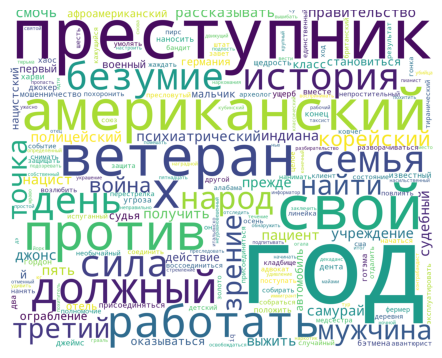

			2 кластер


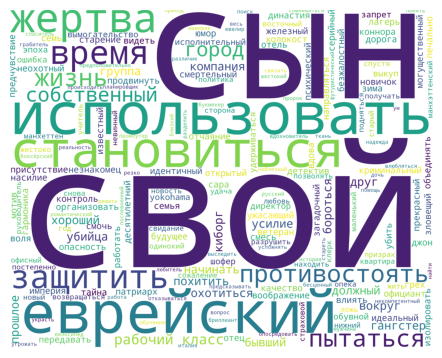

			3 кластер


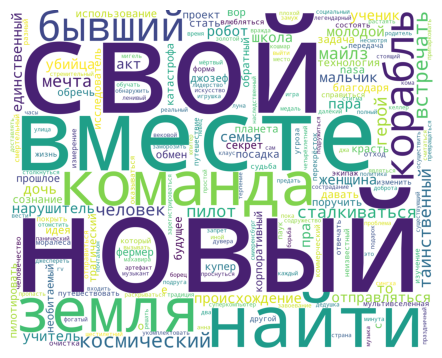

			4 кластер


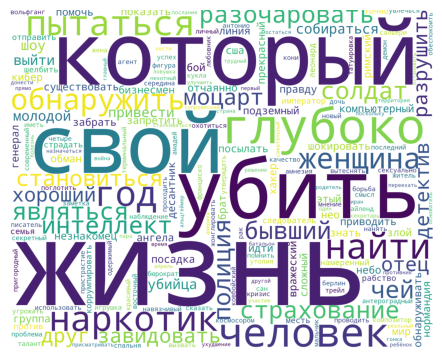

			5 кластер


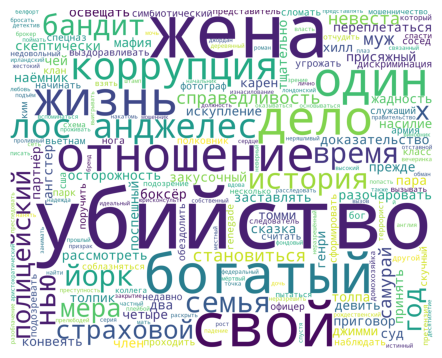

			6 кластер


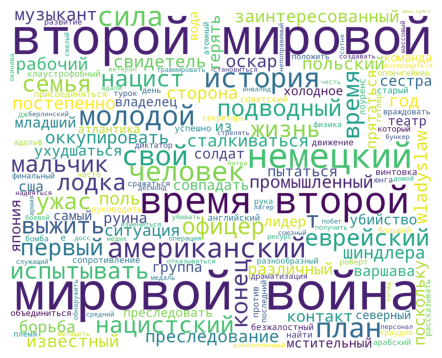

			7 кластер


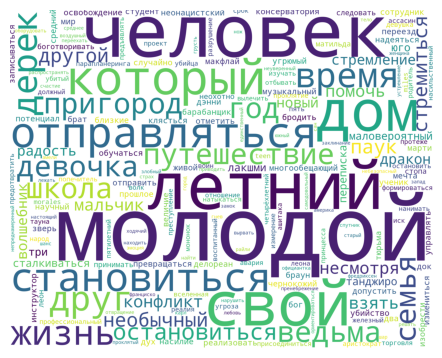

			8 кластер


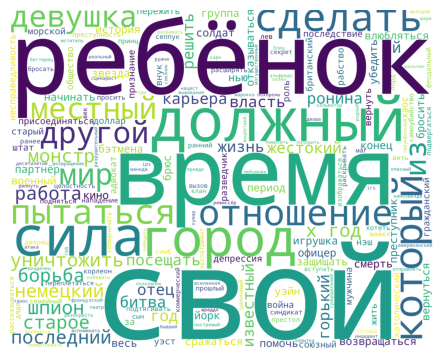

			9 кластер


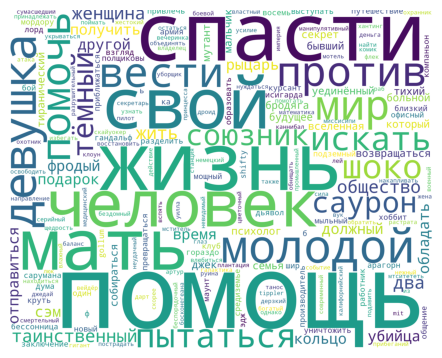

			10 кластер


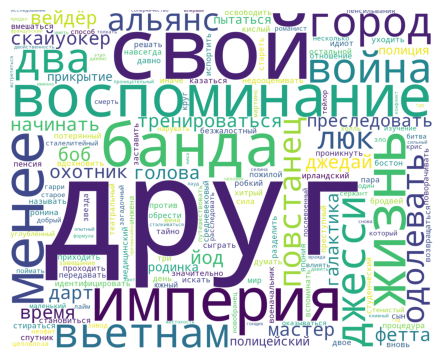

			11 кластер


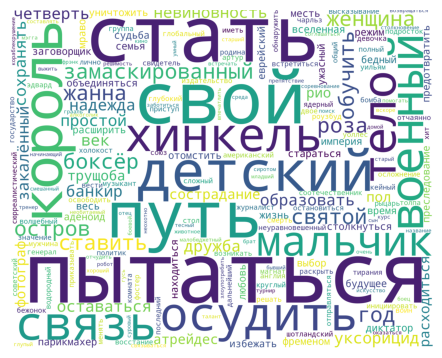

In [131]:
for i in range(df["Кластер"].nunique()):
    print(f"\t\t\t{i+1} кластер")
    cloud = get_cloudwords_by_claster(i)
    fig = plt.figure(figsize=(12, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(cloud)
    plt.axis('off')
    plt.show()

In [133]:
# Даем название
names = {0: "Власть и хаос", 1: "Семейные ценности", 2: "Путешествие по миру", 3: "Смысловые", 4: "Драматические", 5: "Военная тематика", 
         6: "Фонтастика", 7:"", 8:"Романтика", 9:"Исторически-Фантастические фильмы", 10:"Мотивационные "}
def give_cluster_name():
    df["Категория кластера"] = df['Кластер'].map(names)
give_cluster_name()

In [134]:
df

,Название,Год выпуска,Длительность,Описание_перевод,Рейтинг,Страна,Жанр,Обработанный текст,Токенизированный текст,Лематизированный текст,Кластер,Категория кластера
0,Побег из Шоушенка,1994,2h 22m,"Банкир, осужденный за уксорицид, образует друж...",9.3,United States,Drama,"банкир, осужденный за уксорицид, образует друж...","[банкир, ,, осужденный, уксорицид, ,, образует...","банкир , осудить уксорицид , образовать дружба...",10,Мотивационные
1,Крёстный отец,1972,2h 55m,Старение патриарха организованной криминальной...,9.2,United States,"Crime, Drama",старение патриарха организованной криминальной...,"[старение, патриарха, организованной, криминал...",старение патриарх организовать криминальный ди...,1,Семейные ценности
2,Тёмный рыцарь,2008,2h 32m,"Когда угроза, известная как Джокер, наносит ущ...",9.0,"United States, United Kingdom","Action, Crime, Drama","когда угроза, известная как джокер, наносит ущ...","[угроза, ,, известная, джокер, ,, наносит, уще...","угроза , известный джокер , наносить ущерб хао...",0,Власть и хаос
3,Крёстный отец 2,1974,3h 22m,Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...,9.0,United States,"Crime, Drama",ранняя жизнь и карьера вито корлеоне в 1920 -х...,"[ранняя, жизнь, карьера, вито, корлеоне, 1920,...",ранний жизнь карьера вить корлеон 1920 -х год ...,7,
4,12 рaзгневанных мужчин,1957,1h 36m,Присяжные в суде по делу об убийстве в Нью -Йо...,9.0,United States,"Crime, Drama",присяжные в суде по делу об убийстве в нью -йо...,"[присяжные, суде, делу, убийстве, нью, -йорке,...",присяжный суд дело убийство нью -йорк разочаро...,4,Драматические
...,...,...,...,...,...,...,...,...,...,...,...,...
245,Форма голоса,2016,2h 10m,"Глухая девушка, Шоко, издевается популярной Ша...",8.1,Japan,"Animation, Drama","глухая девушка, шоко, издевается популярной ша...","[глухая, девушка, ,, шоко, ,, издевается, попу...","глухой девушка , шоко , издеваться популярный ...",8,Романтика
246,Прислуга,2011,2h 26m,Начинающий автор во время движения за гражданс...,8.1,"United States, India",Drama,начинающий автор во время движения за гражданс...,"[начинающий, автор, время, движения, гражданск...",начинающий автор время движение гражданский пр...,0,Власть и хаос
247,Сука любовь,2000,2h 34m,"Любительский боец ​​собаки, супермодель и забр...",8.0,Mexico,"Drama, Thriller","любительский боец ​​собаки, супермодель и забр...","[любительский, боец, ​​собаки, ,, супермодель,...","любительский боец ​​собака , супермодель забро...",3,Смысловые
248,Ребекка,1940,2h 10m,Самосознательная женщина жонглирует приспособл...,8.1,United States,"Drama, Mystery, Romance",самосознательная женщина жонглирует приспособл...,"[самосознательная, женщина, жонглирует, приспо...",самосознательный женщина жонглировать приспосо...,4,Драматические


## Тематическое моделирование

In [135]:
from gensim.models import CoherenceModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import gensim

In [136]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000,
                             min_df=0.01, stop_words=russian_stopwords,
                             ngram_range=(1,3))

In [137]:
def print_themes_and_titles(df):
    try:
        tfidf_matrix = tfidf_vectorizer.fit_transform(df['Лематизированный текст'])
        lsa_model = TruncatedSVD(n_components=5, random_state=0)
        lsa_model.fit(tfidf_matrix)
        # вывод топ слов для каждой темы
        for i, topic in enumerate(lsa_model.components_):
            print(f"Тема {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")
    except ValueError as e:
        print(f"Ошибка: {e}")


In [138]:
df0 = df[df['Кластер']==0]
df1 = df[df['Кластер']==1]
df2 = df[df['Кластер']==2]
df3 = df[df['Кластер']==3]
df4 = df[df['Кластер']==4]
df5 = df[df['Кластер']==5]
df6 = df[df['Кластер']==6]
df7 = df[df['Кластер']==7]
df8 = df[df['Кластер']==8]
df9 = df[df['Кластер']==9]
df10 = df[df['Кластер']==10]

In [139]:
print_themes_and_titles(df0)

Тема 0: год, преступник, американский, безумие, против, война, корейский война, ветеран корейский война, корейский, ветеран корейский
Тема 1: учреждение, пациент, психиатрический учреждение, психиатрический, ветеран, преступник, ветеран корейский, корейский война, корейский, война
Тема 2: преступник, полицейский, выжить, ограбление, полицейский информатор, простой украшение, начинать подозревать полицейский, преступник начинать, простой украшение ограбление, идти
Тема 3: получить, нацист, джонс, индиана, индиана джонс, правительство, 1936 год археолог, год археолог авантюрист, джонс найти ковчег, джонс найти
Тема 4: американский, психиатрический, пациент, психиатрический учреждение, учреждение, американский маршал отправляться, психиатрический учреждение негостеприимный, маршал, маршал отправляться, учреждение негостеприимный


In [140]:
print_themes_and_titles(df1)

Тема 0: сын, становиться, рабочий класс, класс, рабочий, жертва, город, похитить, становиться жертва, время
Тема 1: город, рабочий, класс, рабочий класс, усилие, спаситель опосредовать, рабочий класс предсказывать, спаситель, приход, опосредовать различие
Тема 2: использовать, охотиться, убийца, собственный, детектив, детектив новичок, ветеран, грех качество, ветеран охотиться, ветеран охотиться серийный
Тема 3: становиться, подозревать исчезновение, исчезновение, подозревать, главный, главный подозревать, пропасть, пропасть женщина, пропасть женщина становиться, женщина становиться главный
Тема 4: пытаться, собственный, начинать, начинать сомневаться близкий, понять происходить, понять, близкий, близкий собственный, близкий собственный ум, ткань реальность


In [141]:
print_themes_and_titles(df2)

Тема 0: корабль, найти, космический, космический корабль, новый, человек, таинственный, происхождение, земля, отправляться
Тема 1: новый, пара, нарушитель, майлз, герой, ученик, мальчик, школа, учитель, молодой
Тема 2: вместе, робот, единственный, женщина, земля, мужчина, молодой мужчина женщина, молодой мужчина, европа однажды вечером, вечером проводить
Тема 3: убийца, бывший, команда, убийца предать, проснуться, убийца отомстить команда, команда убийца предать, команда убийца, четырёхлетний, четырёхлетний кома
Тема 4: пара, сталкиваться, мечта, вор, посадка идея сознание, давать обратный задача, давать обратный, давать, проект, проект команда


In [142]:
print_themes_and_titles(df3)

Тема 0: жизнь, пытаться, найти, обнаружить, пытаться найти, убить, наркотик, женщина, смысл жизнь, рак
Тема 1: наркотик, глубоко, друг, разрушить, хороший, кони, житель кони айленд, четыре, проходить, проходить глубоко
Тема 2: глубоко, детектив, убить, женщина, год, моцарт, полиция, становиться, бывший, человек
Тема 3: шоу, человек, жизнь, страхование, являться, являться род реалить, подозревать весь, жизнь дело являться, начинать, начинать подозревать
Тема 4: чей, убить, привести, посадка нормандия группа, убить бой, бой, забрать, группа солдат сша, десантник, посадка нормандия


In [143]:
print_themes_and_titles(df4)

Тема 0: анджелес, лос, лос анджелес, убийство, год лос, год лос анджелес, год, коррупция, полицейский, жена
Тема 1: жена, богатый, жизнь, отношение, идеальный убийство, плейбой представлять идеальный, плейбой представлять, плейбой, лондонский, неверный жена
Тема 2: дело, дело убийство, нью, йорк, нью йорк, осторожность, осторожность заставлять, осторожность заставлять тщательно, тщательно рассмотреть доказательство, принять
Тема 3: богатый, убийство, муж, страховой, самурай, невеста, 18, век, выигрывать сердце богатый, сердце
Тема 4: бандит, жизнь, невеста, самурай, сказка насилие, пара, наёмник, закусочный бандит переплетаться, закусочный бандит, наёмник толпа


In [144]:
print_themes_and_titles(df5)

Тема 0: время второй мировой, время второй, время, сила, немецкий, план, молодой, мальчик, молодой мальчик, выжить
Тема 1: молодой, лодка, подводный, подводный лодка, испытывать ужас, ужас, испытывать, мальчик, молодой мальчик, найти
Тема 2: конец второй, конец, конец второй мировой, история, жизнь, развитие атомный бомба, больший, больший рука, бомба положить конец, больший рука развитие
Тема 3: американский, человек, первый, война травмировать инвалид, американский средний запад, травмировать, семья непоправимый, семья непоправимый измениться, травмировать инвалид, ветеран второй мировой
Тема 4: семья, запад обнаружить семья, домой, домой американский средний, запад, запад обнаружить, непоправимый, измениться, инвалид, инвалид возвращаться


In [145]:
print_themes_and_titles(df6)

Тема 0: молодой, человек, летний, молодой человек, становиться, пригород, время, жизнь, дракон, дом
Тема 1: летний, 44 летний, переписка, 44, 12 летний, 12, девочка, летний девочка, предъявлять иск родитель, летний мальчик предъявлять
Тема 2: человек, лакшми, дерек, стремление, человек паук, паук, путешествие, путешествие время, помочь, время
Тема 3: человек паук, паук, становиться, молодой человек, человек, аристократ нанимать молодой, аристократ нанимать, четырёхлетний авария, четырёхлетний, авария парапланеринга
Тема 4: остановиться, записываться музыкальный консерватория, реализовать потенциал, барабанщик, консерватория мечта величие, консерватория мечта, консерватория, инструктор остановиться реализовать, инструктор остановиться, инструктор


In [146]:
print_themes_and_titles(df7)

Тема 0: ребёнок, город, отношение, время, монстр, немецкий, год, сделать, преступник, пытаться
Тема 1: год, время, 1920, 1920 год, сделать, девушка, разведчик, отношение, убедить, игрушка
Тема 2: йорк, нью, нью йорк, рабство, время, штат, группа, начинать, шпион, пытаться
Тема 3: местный, офицер, морской, история, католический, хаос, старое, битва, возвращаться, известный
Тема 4: работа, нью йорк, йорк, нью, битва, штат, чёрный человек северный, свободный чёрный, свободный, чёрный


In [147]:
print_themes_and_titles(df8)

Тема 0: помощь, спасти, жизнь, молодой, пытаться, мать, девушка, вести, таинственный, мир
Тема 1: саурон, против, фродый, фродый сэм, сэм, вести, спасти, человек, кольцо, мир
Тема 2: против, помощь, женщина, саурон, сэм, фродый, фродый сэм, союзник, тиранический, бродяга
Тема 3: искать, помочь, мать, уединённый, секрет, девушка, бывший, саурон, против, мальчик
Тема 4: шоко, таинственный, обладать, спасти, рыцарь, возвращаться, подарок, узнать нежный гигант, обладать таинственный, смертельный охранник


In [148]:
print_themes_and_titles(df9)

Тема 0: друг друг, менее, джесси, банда, воспоминание, отношение становиться, становиться кислый, кислый, стираться друг друг, стираться друг
Тема 1: вьетнам, война, жизнь, маленький сталелитейный завод, изучение способ, пенсильвания, нарушать жизнь, углублённый изучение способ, углублённый изучение, углублённый
Тема 2: город, банда, банда решать сыграть, банда решать, разделить преступный банда, друг освободить, хитрый, решать, разделить преступный, против друг
Тема 3: воспоминание, мир называть, возвращаться студенческий, называть идиот, вспоминать воспоминание друг, вспоминать воспоминание, вспоминать, остальной, остальной мир, остальной мир называть
Тема 4: друг галактика, дарт вейдёр охотник, мастер, люк скайуокер начинать, люк скайуокер, люк, йод время дарт, йод время, йод, империя одолевать альянс


In [149]:
print_themes_and_titles(df10)

Тема 0: стать, детский, пытаться, мальчик, тело, король, путь, трущоба рио, фотограф, путь расходиться пытаться
Тема 1: пытаться, осудить, жанна, король, святой, хинкель, дружба четверть, простой сострадание, образовать дружба, банкир
Тема 2: тело, мальчик, детский, найти тело пропасть, друг, детский путешествие друг, детский путешествие, пропасть, пропасть мальчик, путешествие
Тема 3: король, воин уильям, король эдвард, тирания король эдвард, восстание, воин уильям уоллес, вести, вести соотечественник, уоллес вести соотечественник, уоллес вести
Тема 4: год, жанна, 1930, 1930 год, 1930 год монастырь, военный морской, гувернанта, монастырь послать молодой, морской, военный морской офицер


In [ ]:
names = {}
def give_cluster_name():
    df["Категория кластера моделирование"] = df['Кластер'].map(names)
give_cluster_name()

### Сохранеине дата сета

In [150]:
df.to_csv("3Films_Themes.csv", index=False, encoding='utf-8-sig')

# Классификация

In [151]:
X_text = tfidf_vectorizer.fit_transform(df['Лематизированный текст'])

In [152]:
from sklearn.model_selection import train_test_split
y = df['Кластер']
X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.3, random_state=19)

# RandomForestClassifier

In [153]:
from sklearn.ensemble import RandomForestClassifier
randomfc = RandomForestClassifier(n_estimators=100)
randomfc.fit(X_train, y_train)

RandomForestClassifier()

In [154]:
y_pred = randomfc.predict(X_test)

In [155]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.50      0.55         6
           1       1.00      0.60      0.75         5
           2       1.00      0.57      0.73         7
           3       0.57      0.50      0.53         8
           4       1.00      0.25      0.40         8
           5       1.00      1.00      1.00         3
           6       0.57      0.67      0.62         6
           7       0.42      0.83      0.56        18
           8       0.60      0.50      0.55         6
           9       1.00      0.67      0.80         3
          10       0.00      0.00      0.00         5

    accuracy                           0.57        75
   macro avg       0.71      0.55      0.59        75
weighted avg       0.65      0.57      0.56        75



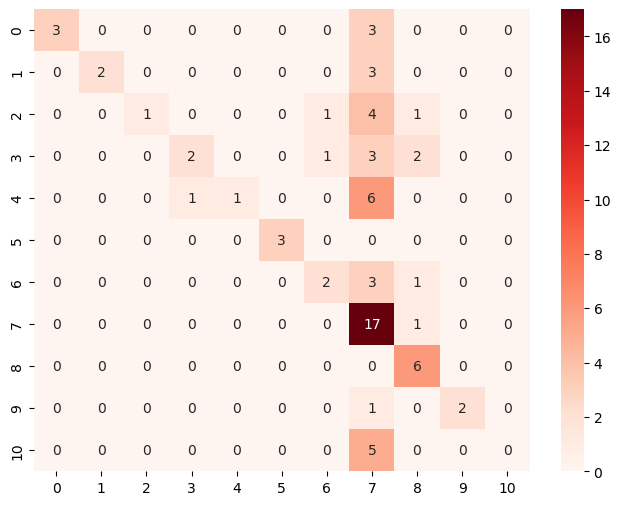

In [161]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.show()

In [164]:
with open('3modelFilmsII.pkl', 'wb') as file:
    pickle.dump(randomfc, file)

# LogisticRegression

In [157]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [158]:
    y_pred = lr.predict(X_test)
    print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       1.00      0.40      0.57         5
           2       1.00      0.14      0.25         7
           3       0.67      0.25      0.36         8
           4       1.00      0.12      0.22         8
           5       1.00      1.00      1.00         3
           6       0.50      0.33      0.40         6
           7       0.38      0.94      0.54        18
           8       0.55      1.00      0.71         6
           9       1.00      0.67      0.80         3
          10       1.00      0.00      0.00         5

    accuracy                           0.52        75
   macro avg       0.83      0.49      0.50        75
weighted avg       0.74      0.52      0.47        75



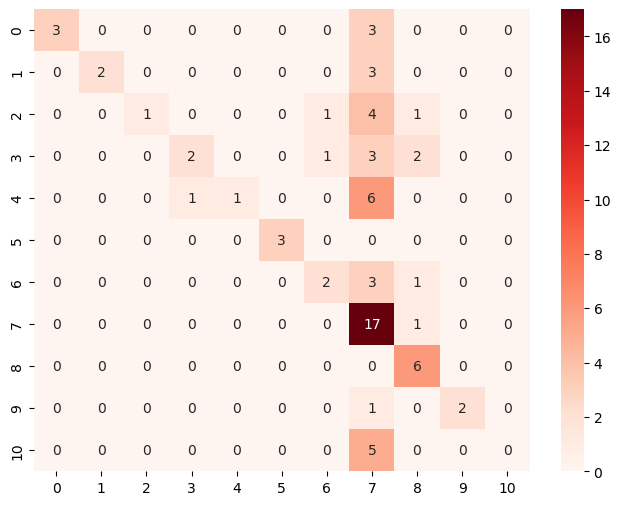

In [159]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.show()